https://github.com/ddangelov/Top2Vec

In [1]:
!pip install top2vec

     |████████████████████████████████| 1.1 MB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 7.4 MB/s eta 0:00:01
  Using cached transformers-3.0.2-py3-none-any.whl (769 kB)
     |████████████████████████████████| 2.2 MB 19.7 MB/s eta 0:00:01


     |████████████████████████████████| 6.6 MB 9.6 MB/s eta 0:00:01
  Created wheel for pynndescent: filename=pynndescent-0.5.0-py3-none-any.whl size=48987 sha256=df59e2847a38b96bb7c02a29063ce46260e7e1744419eea7965a96a86f3dd51b
  Stored in directory: /Users/sdeshpande/Library/Caches/pip/wheels/d7/53/ff/50120c985507267e9b381026bd35114c2cf19d53b243677053
Successfully built pynndescent
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: numba 0.51.2 has requirement llvmlite<0.35,>=0.34.0.dev0, but you'll have llvmlite 0.33.0+1.g022ab0f which is incompatible.
ERROR: medacy 1.0.0 has requirement transformers==2.3.0, but you'll have transformers 3.0.2 which is incompatible.
ERROR: awscli 1.18.163 has requirement botocore==1.19.3, but you'll have botocore 1.17.63 which is incompatible.
  Attempting uninstall: numba
    Found existing installation: numba 0.50.1
    Uninstalling numba-0.50.1:
      Successfully uninstalled numba-0.50.1

In [2]:
from top2vec import Top2Vec

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [7]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
print(newsgroups.data[0:5])

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n", 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-perf

In [9]:
len(newsgroups.data)

18846

In [8]:
model = Top2Vec(documents=newsgroups.data, speed="learn", workers=8)

2020-10-24 09:26:48,371 - top2vec - INFO - Pre-processing documents for training
2020-10-24 09:26:54,740 - top2vec - INFO - Creating joint document/word embedding
2020-10-24 09:30:31,067 - top2vec - INFO - Creating lower dimension embedding of documents
2020-10-24 09:30:47,274 - top2vec - INFO - Finding dense areas of documents
2020-10-24 09:30:48,206 - top2vec - INFO - Finding topics


In [10]:
# This will return the number of topics that Top2Vec has found in the data.
model.get_num_topics()

134

In [11]:
# This will return the number of documents most similar to each topic. Topics are in decreasing order of size.
topic_sizes, topic_nums = model.get_topic_sizes()

In [12]:
topic_sizes

array([788, 742, 692, 643, 556, 518, 510, 486, 441, 393, 376, 371, 362,
       332, 330, 322, 309, 306, 296, 240, 230, 229, 229, 224, 221, 218,
       207, 197, 184, 183, 176, 175, 174, 164, 151, 141, 128, 126, 113,
       111, 111, 110, 110, 109, 105, 105, 104, 101, 100,  99,  98,  98,
        98,  96,  95,  92,  91,  91,  90,  89,  88,  88,  87,  87,  87,
        86,  84,  82,  78,  77,  76,  75,  74,  73,  72,  72,  71,  69,
        68,  68,  67,  67,  66,  66,  65,  64,  63,  63,  62,  62,  62,
        61,  61,  59,  59,  58,  58,  57,  57,  56,  56,  54,  54,  54,
        53,  53,  52,  52,  51,  51,  49,  48,  48,  46,  46,  46,  41,
        41,  41,  41,  41,  40,  40,  40,  37,  36,  34,  34,  34,  34,
        32,  31,  29,  26])

In [17]:
# This will return the topics in decreasing size.
topic_words, word_scores, topic_nums = model.get_topics(130)

In [21]:
# We are going to search for topics most similar to medicine.
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)

In [22]:
topic_nums

array([  4, 128,  85,  22,  40])

In [27]:
topic_scores

array([0.4859, 0.3471, 0.2773, 0.2342, 0.2302])

In [29]:
topic_words[0]

array(['patients', 'symptoms', 'disease', 'treatment', 'patient',
       'therapy', 'diet', 'clinical', 'doctor', 'infection', 'physician',
       'candida', 'treatments', 'syndrome', 'vitamin', 'nutrition',
       'diagnosis', 'medical', 'diagnosed', 'yeast', 'infections',
       'placebo', 'foods', 'physicians', 'medicine', 'chronic', 'liver',
       'doctors', 'effects', 'dose', 'eating', 'kidney', 'severe',
       'illness', 'bacteria', 'cancer', 'med', 'surgery', 'pain',
       'breast', 'studies', 'immune', 'diseases', 'depression', 'toxic',
       'food', 'study', 'drug', 'oral', 'drugs'], dtype='<U15')

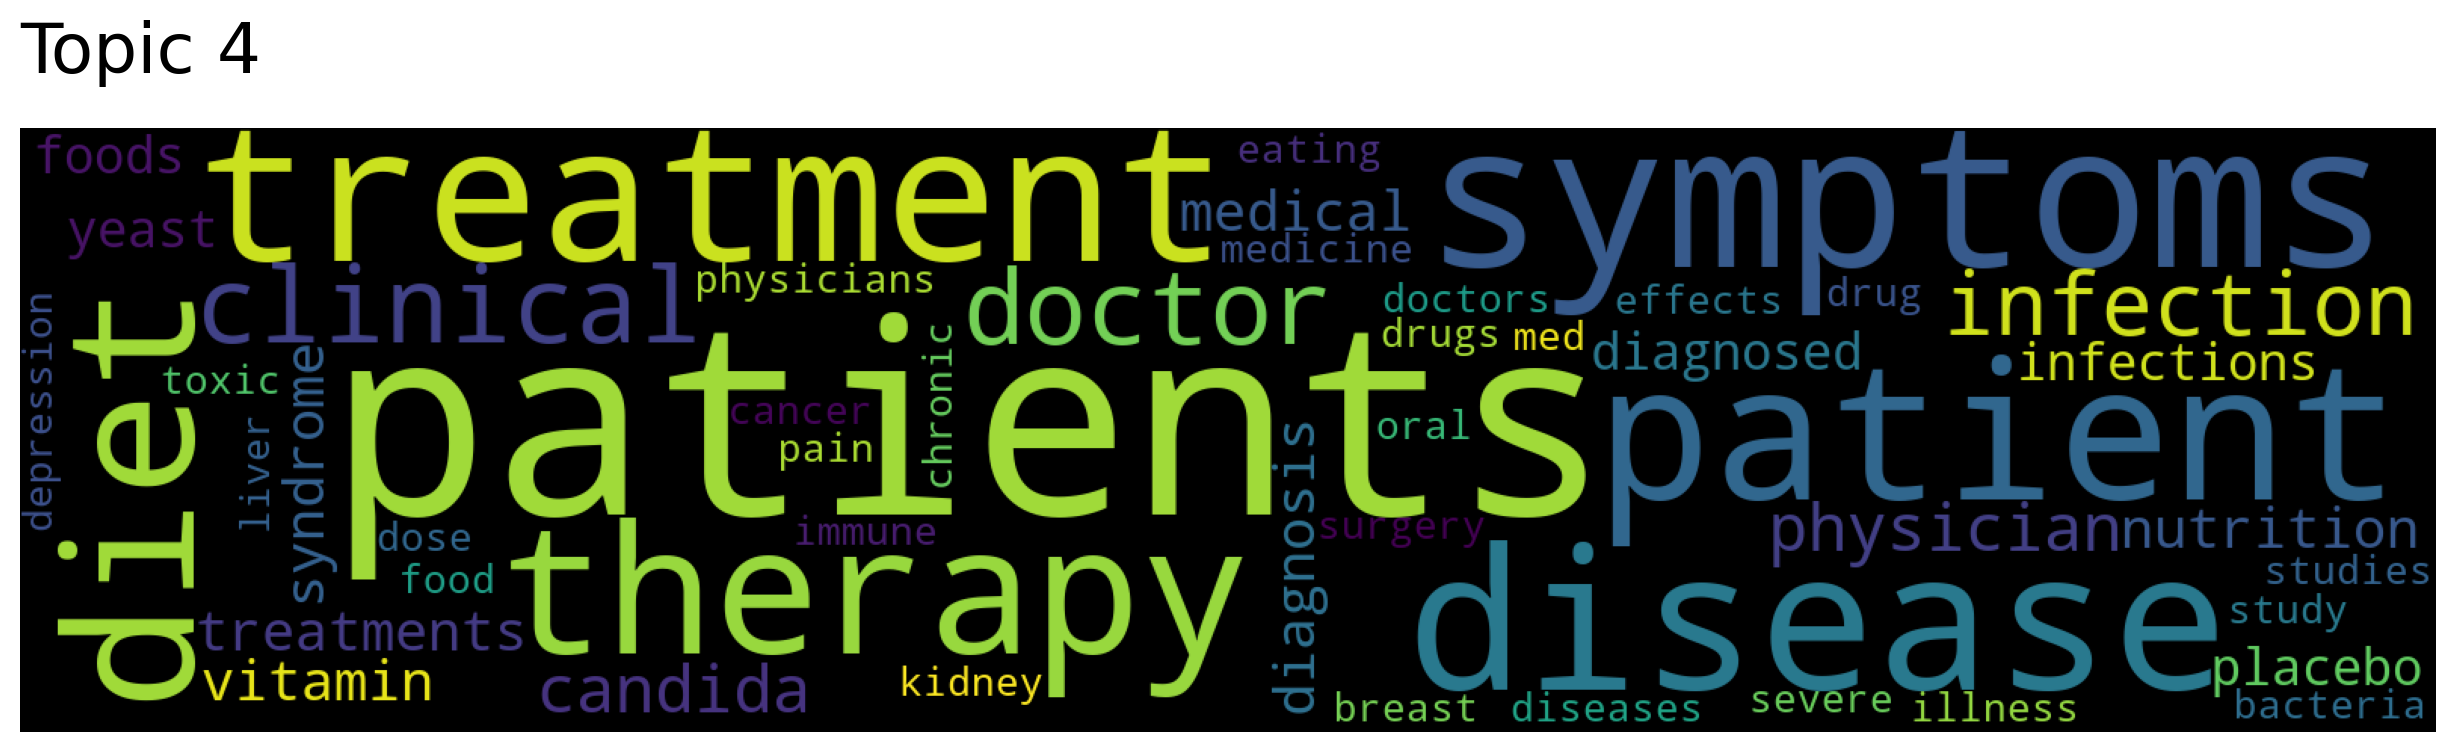

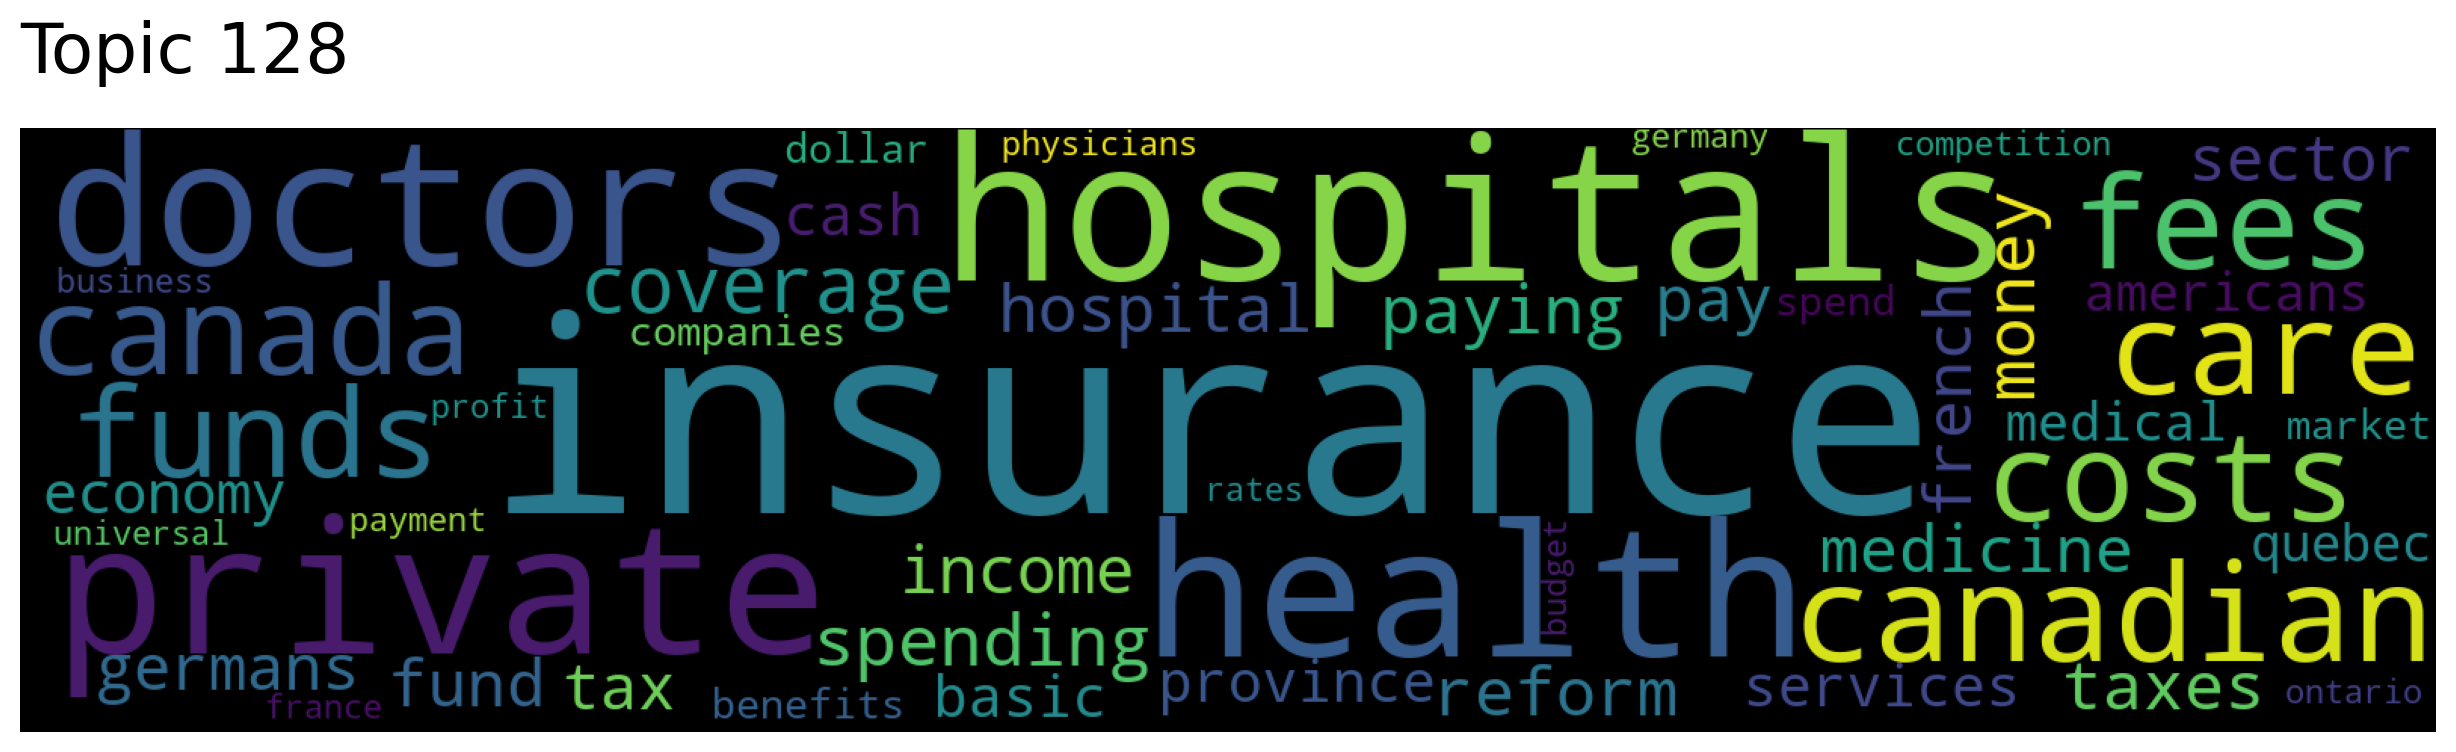

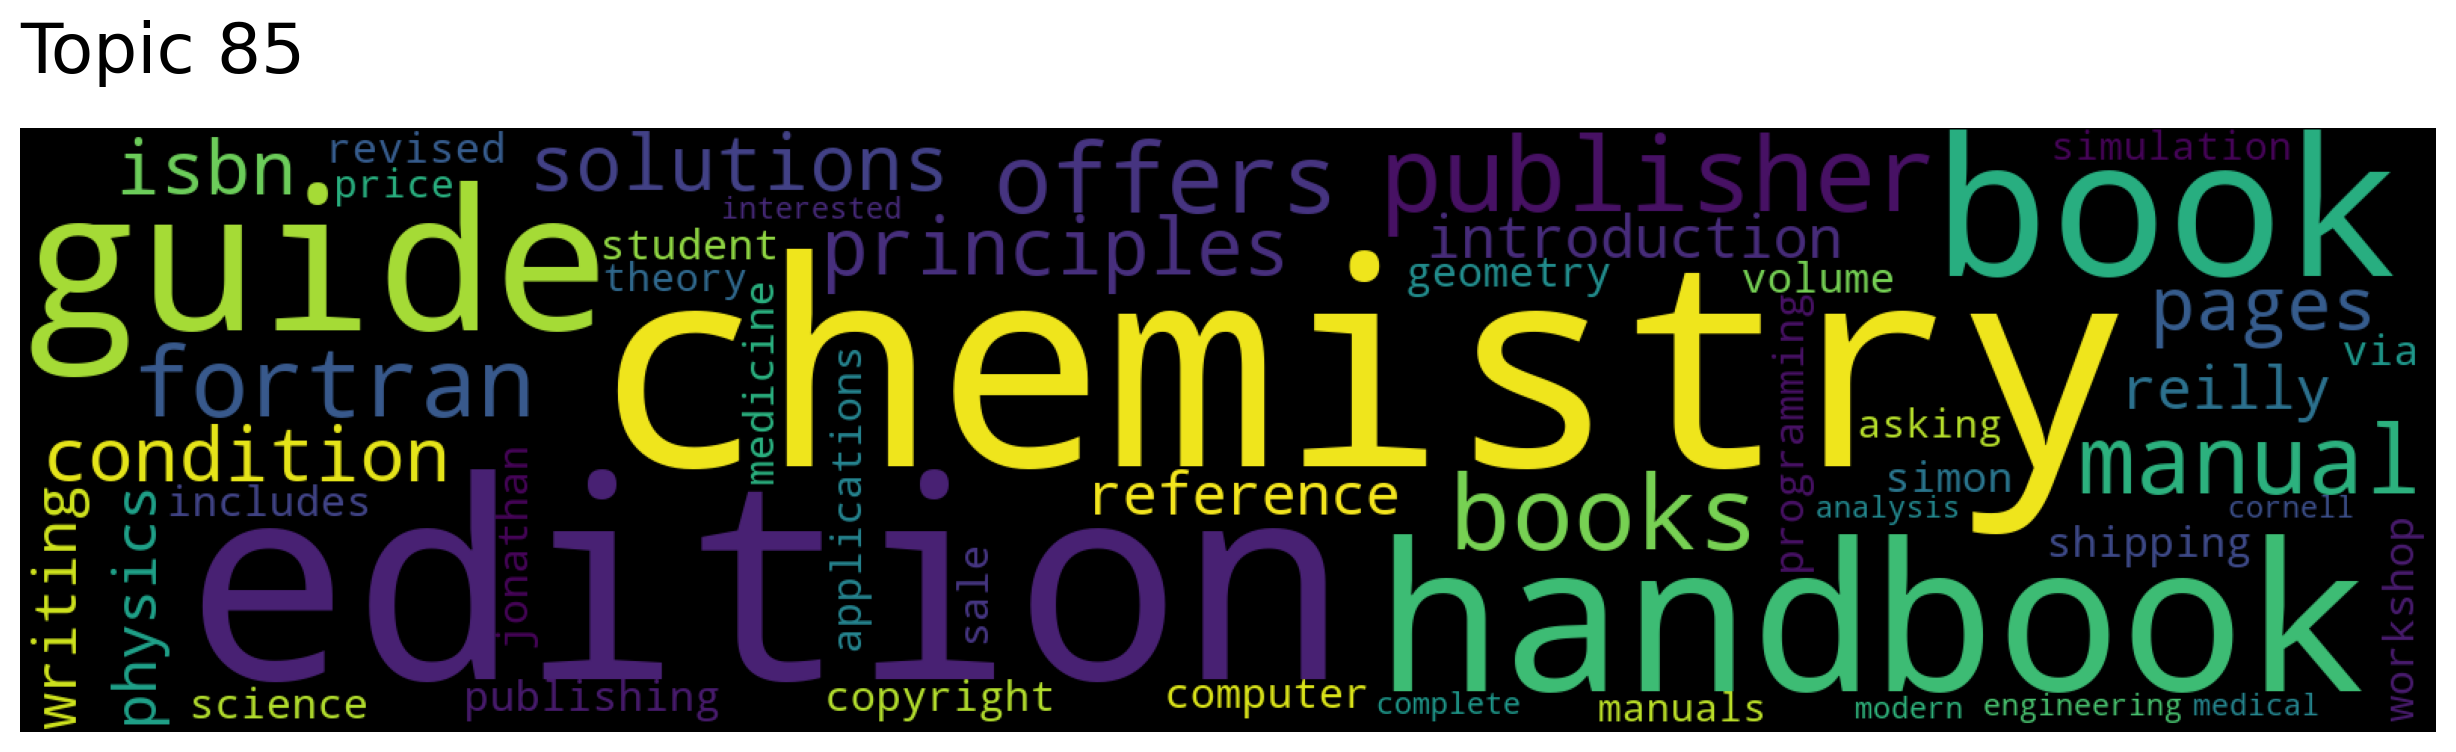

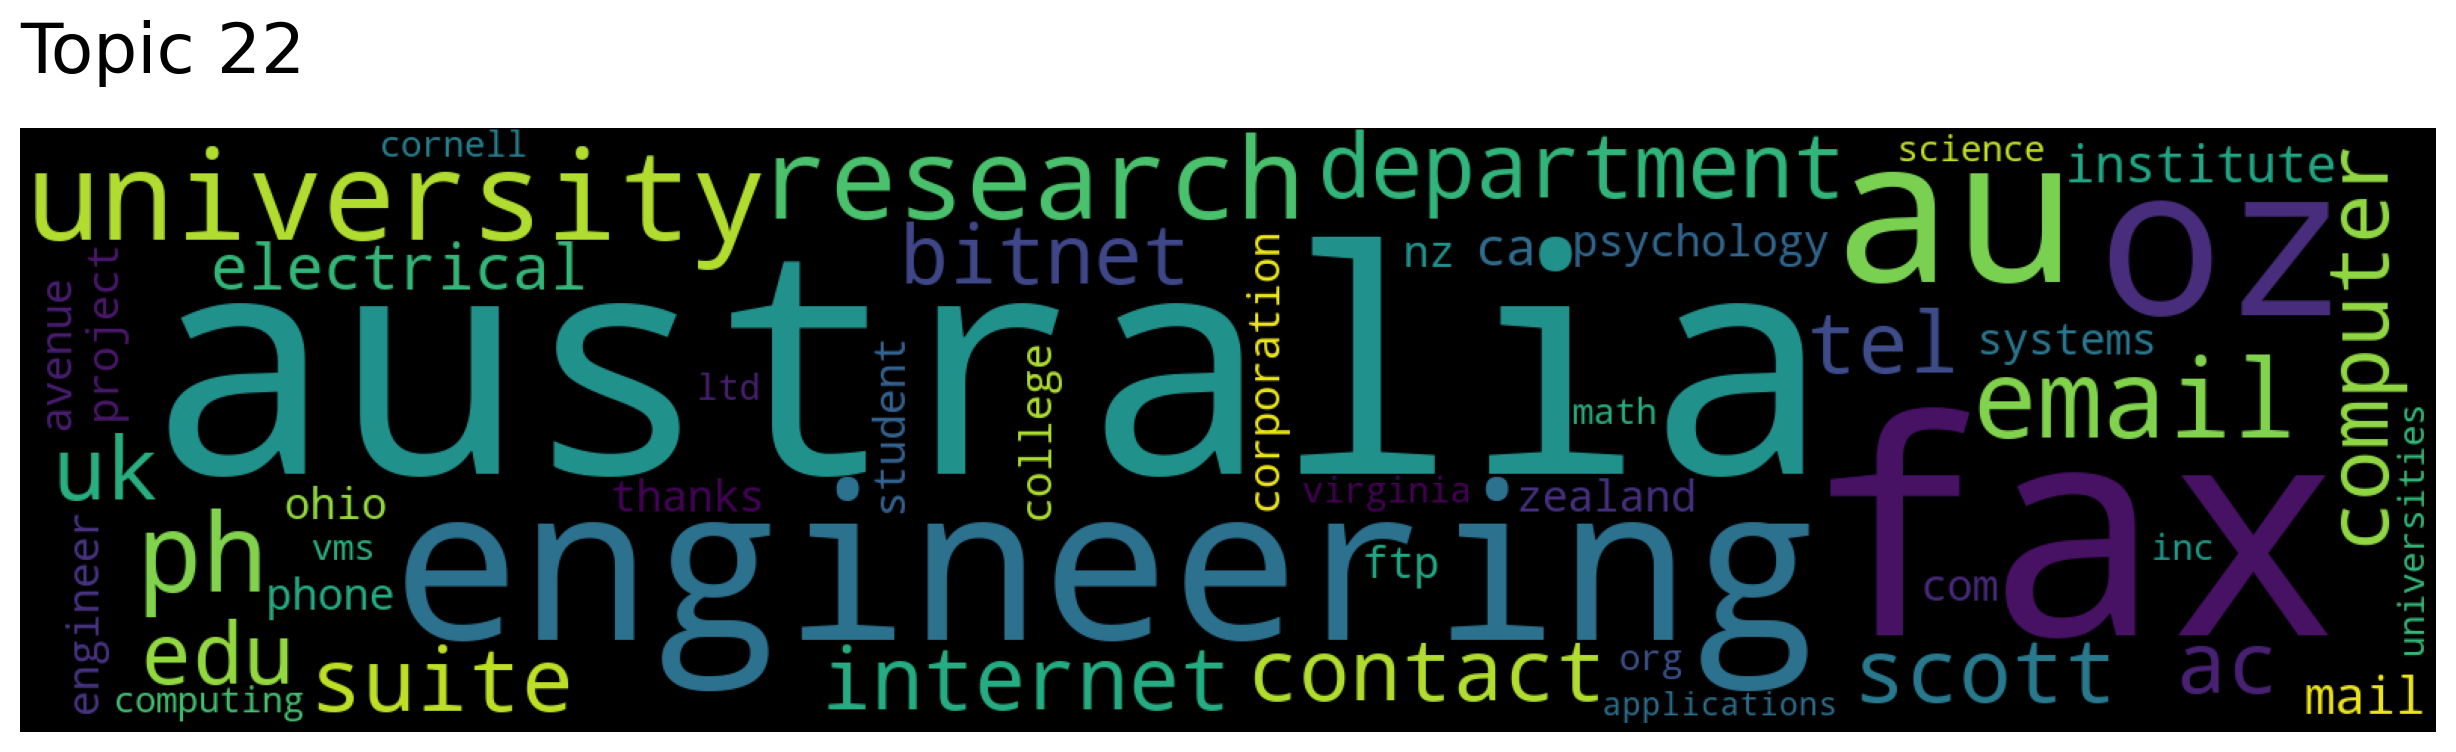

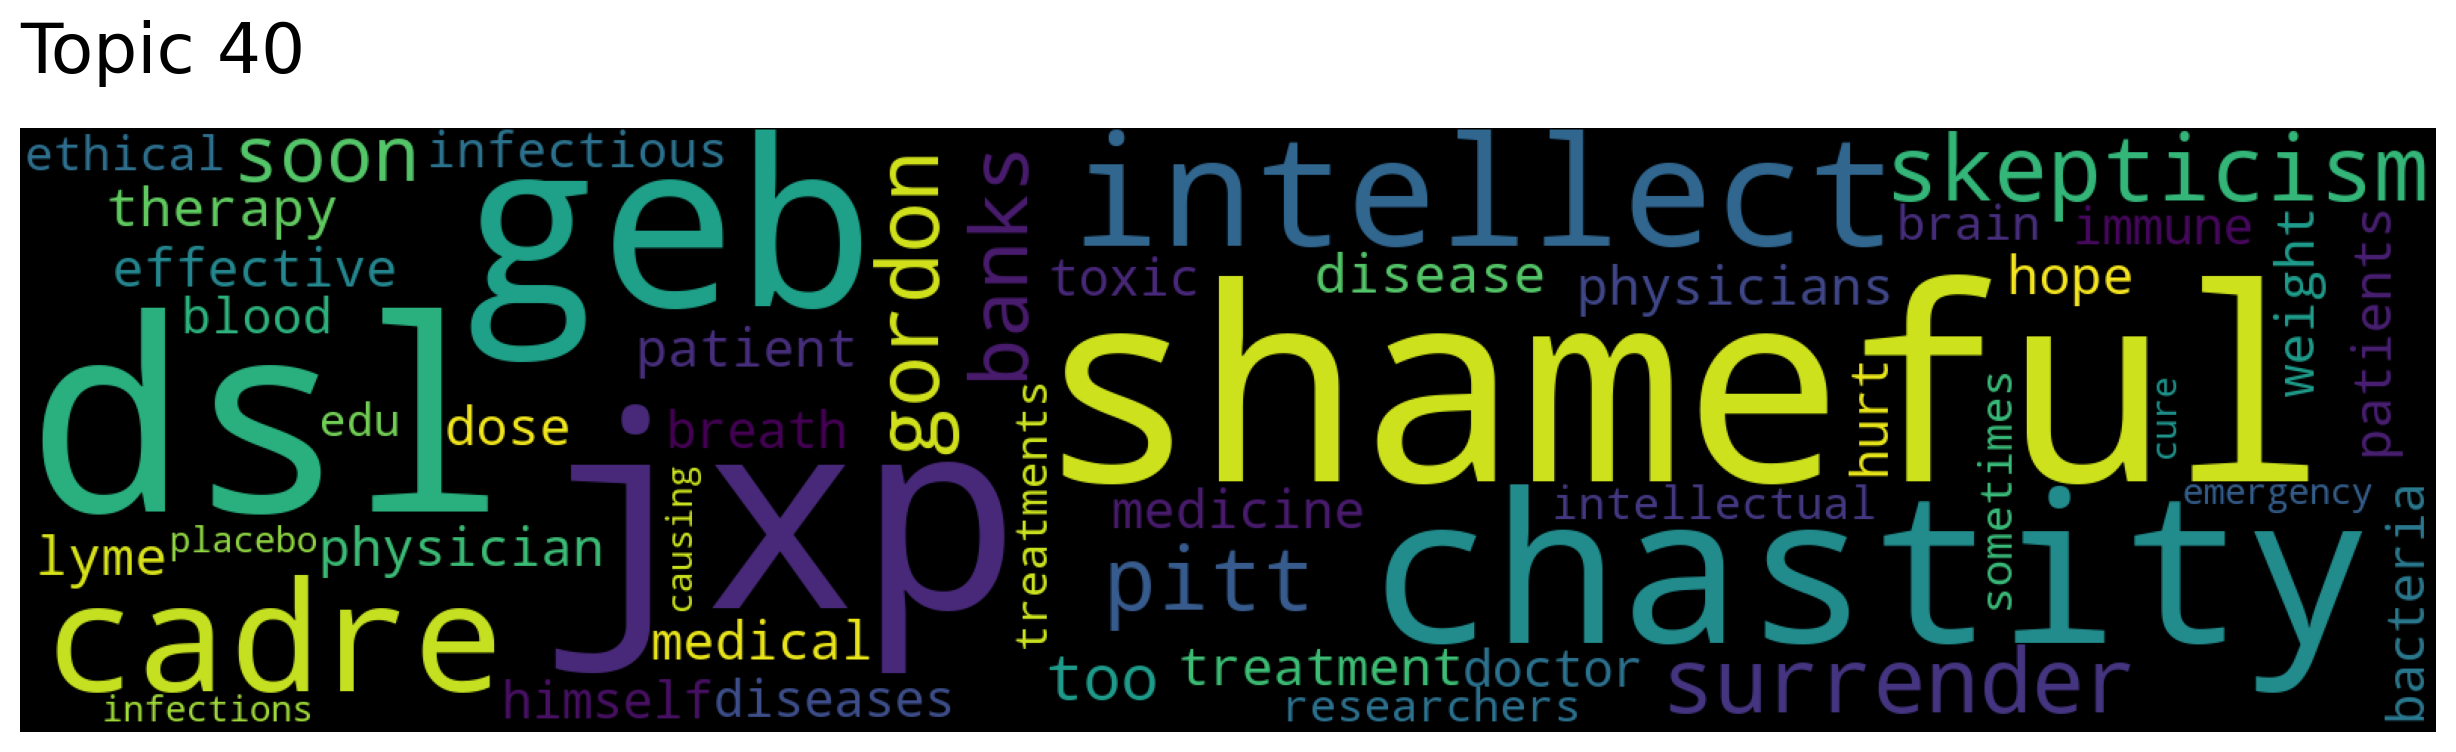

In [30]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [31]:
# We are going to search by topic 4, a topic that appears to be about patients.
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=4, num_docs=5)

In [32]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=4, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 3792, Score: 0.6839697360992432
-----------
Someone I know has recently been diagnosed as having Candida Albicans, 
a disease about which I can find no information.  Apparently it has something
to do with the body's production of yeast while at the same time being highly
allergic to yeast.  Can anyone out there tell me any more about it?

Thanks.
-----------

Document: 8308, Score: 0.6716091632843018
-----------

I guess I'm still not clear on what the term "candida bloom" means,
but certainly it is well known that thrush (superficial candidal
infections on mucous membranes) can occur after antibiotic use.
This has nothing to do with systemic yeast syndrome, the "quack"
diagnosis that has been being discussed.



Lucky how?  Since a recent article (randomized controlled trial) of
oral yogurt on reducing vaginal candidiasis, I've mentioned to a 
number of patients with frequent vaginal yeast infections that they
could try eating 6 ounces of yogurt daily.  It turns out most wou

In [33]:
# Search documents for content semantically similar to cryptography and privacy.
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["cryptography", "privacy"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 16837, Score: 0.6468
-----------
Archive-name: net-privacy/part2
Last-modified: 1993/3/3
Version: 2.1


IDENTITY, PRIVACY, and ANONYMITY on the INTERNET

(c) 1993 L. Detweiler.  Not for commercial use except by permission
from author, otherwise may be freely copied.  Not to be altered. 
Please credit if quoted.

SUMMARY

Email and account privacy, anonymity, file encryption,  academic 
computer policies, relevant legislation and references, EFF, and 
other privacy and rights issues associated with use of the Internet
and global networks in general.

(Search for <#.#> for exact section. Search for '_' (underline) for
next section.)

PART 2
====== (this file)

Resources
---------

<4.1> What UNIX programs are related to privacy?
<4.2> How can I learn about or use cryptography?
<4.3> What is the cypherpunks mailing list?
<4.4> What are some privacy-related newsgroups?  FAQs?
<4.5> What is internet Privacy Enhanced Mail (PEM)?
<4.6> What are other Request For Comments (RFCs) rela

In [34]:
# Search for similar words to space.
words, word_scores = model.similar_words(keywords=["space"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

nasa 0.6664
shuttle 0.6101
planetary 0.5624
exploration 0.5292
launch 0.5192
astro 0.4981
ames 0.4904
telescope 0.4892
astronomy 0.4882
satellite 0.484
orbital 0.4808
missions 0.4776
propulsion 0.4732
orbit 0.4711
astronomical 0.4524
observatory 0.4521
jsc 0.4514
orbiting 0.4504
rocket 0.4438
flight 0.439
